In [ ]:
import sys, os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
symbol = "^TYX"
data = yf.download(symbol, start="1998-01-01", end="2024-01-01", interval="1d")
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price                     Adj Close  Close   High    Low   Open Volume
Ticker                         ^TYX   ^TYX   ^TYX   ^TYX   ^TYX   ^TYX
Date                                                                  
1998-01-02 00:00:00+00:00     5.848  5.848  5.922  5.838  5.920      0
1998-01-05 00:00:00+00:00     5.729  5.729  5.790  5.725  5.788      0
1998-01-06 00:00:00+00:00     5.718  5.718  5.771  5.714  5.723      0
1998-01-07 00:00:00+00:00     5.793  5.793  5.801  5.727  5.742      0
1998-01-08 00:00:00+00:00     5.746  5.746  5.758  5.712  5.739      0


In [ ]:
data.to_csv("Treasury_Bond_Yield_30Y.csv")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
yield_day = pd.read_csv('./Treasury_Bond_Yield_30Y.csv')

In [ ]:
yield_day.head(10)

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,^TYX,^TYX,^TYX,^TYX,^TYX,^TYX
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,1998-01-02 00:00:00+00:00,5.8480000495910645,5.8480000495910645,5.921999931335449,5.8379998207092285,5.920000076293945,0
3,1998-01-05 00:00:00+00:00,5.729000091552734,5.729000091552734,5.789999961853027,5.724999904632568,5.788000106811523,0
4,1998-01-06 00:00:00+00:00,5.7179999351501465,5.7179999351501465,5.770999908447266,5.714000225067139,5.7230000495910645,0
5,1998-01-07 00:00:00+00:00,5.793000221252441,5.793000221252441,5.801000118255615,5.7270002365112305,5.742000102996826,0
6,1998-01-08 00:00:00+00:00,5.745999813079834,5.745999813079834,5.757999897003174,5.711999893188477,5.738999843597412,0
7,1998-01-09 00:00:00+00:00,5.703999996185303,5.703999996185303,5.791999816894531,5.698999881744385,5.751999855041504,0
8,1998-01-12 00:00:00+00:00,5.695000171661377,5.695000171661377,5.7220001220703125,5.6620001792907715,5.690999984741211,0
9,1998-01-13 00:00:00+00:00,5.703999996185303,5.703999996185303,5.71999979019165,5.690999984741211,5.705999851226807,0


In [ ]:
yield_day = yield_day.rename(columns={'Price': 'Date'})
yield_day = yield_day.drop(yield_day.index[[0,1]]) #elimina por posición no por indice
yield_day.reset_index(drop=True, inplace=True)
yield_day.head(10)
print(yield_day.columns)

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [ ]:
yield_day.set_index('Date', inplace=True)
yield_day.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
1998-01-02 00:00:00+00:00,5.8480000495910645,5.8480000495910645,5.921999931335449,5.8379998207092285,5.920000076293945,0
1998-01-05 00:00:00+00:00,5.729000091552734,5.729000091552734,5.789999961853027,5.724999904632568,5.788000106811523,0
1998-01-06 00:00:00+00:00,5.7179999351501465,5.7179999351501465,5.770999908447266,5.714000225067139,5.7230000495910645,0
1998-01-07 00:00:00+00:00,5.793000221252441,5.793000221252441,5.801000118255615,5.7270002365112305,5.742000102996826,0
1998-01-08 00:00:00+00:00,5.745999813079834,5.745999813079834,5.757999897003174,5.711999893188477,5.738999843597412,0


In [ ]:
yield_day['Close'] = pd.to_numeric(yield_day['Close'])
yield_day['Close'] = yield_day['Close'].interpolate()
yield_day['Close'].head(10)

,Close
Date,
1998-01-02 00:00:00+00:00,5.848
1998-01-05 00:00:00+00:00,5.729
1998-01-06 00:00:00+00:00,5.718
1998-01-07 00:00:00+00:00,5.793
1998-01-08 00:00:00+00:00,5.746
1998-01-09 00:00:00+00:00,5.704
1998-01-12 00:00:00+00:00,5.695
1998-01-13 00:00:00+00:00,5.704
1998-01-14 00:00:00+00:00,5.731


In [ ]:
yield_day.index = pd.to_datetime(yield_day.index).tz_convert(None)
print(yield_day.index)

DatetimeIndex(['1998-01-02', '1998-01-05', '1998-01-06', '1998-01-07',
               '1998-01-08', '1998-01-09', '1998-01-12', '1998-01-13',
               '1998-01-14', '1998-01-15',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=6531, freq=None)


In [ ]:
start_date = "1998-01-01"
yield_day = yield_day.loc[start_date:]
yield_day['Close'].head(10)

,Close
Date,
1998-01-02,5.848
1998-01-05,5.729
1998-01-06,5.718
1998-01-07,5.793
1998-01-08,5.746
1998-01-09,5.704
1998-01-12,5.695
1998-01-13,5.704
1998-01-14,5.731


In [ ]:
print('\nUnique dates in our data: ', len(yield_day.index.unique()), 'Days')
our_date_range = yield_day.index.max() - yield_day.index.min()
print('Total days in our date range:', our_date_range.days, 'Days')
new_index = pd.date_range(yield_day.index.min(), yield_day.index.max())
print(new_index)


Unique dates in our data:  6531 Days
Total days in our date range: 9492 Days
DatetimeIndex(['1998-01-02', '1998-01-03', '1998-01-04', '1998-01-05',
               '1998-01-06', '1998-01-07', '1998-01-08', '1998-01-09',
               '1998-01-10', '1998-01-11',
               ...
               '2023-12-20', '2023-12-21', '2023-12-22', '2023-12-23',
               '2023-12-24', '2023-12-25', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', length=9493, freq='D')


In [ ]:
yield_day_new = yield_day.reindex(new_index, fill_value=0)
yield_day_new['Close'].head(10)

,Close
1998-01-02,5.848
1998-01-03,0.000
1998-01-04,0.000
1998-01-05,5.729
1998-01-06,5.718
1998-01-07,5.793
1998-01-08,5.746
1998-01-09,5.704
1998-01-10,0.000
1998-01-11,0.000


<Axes: >

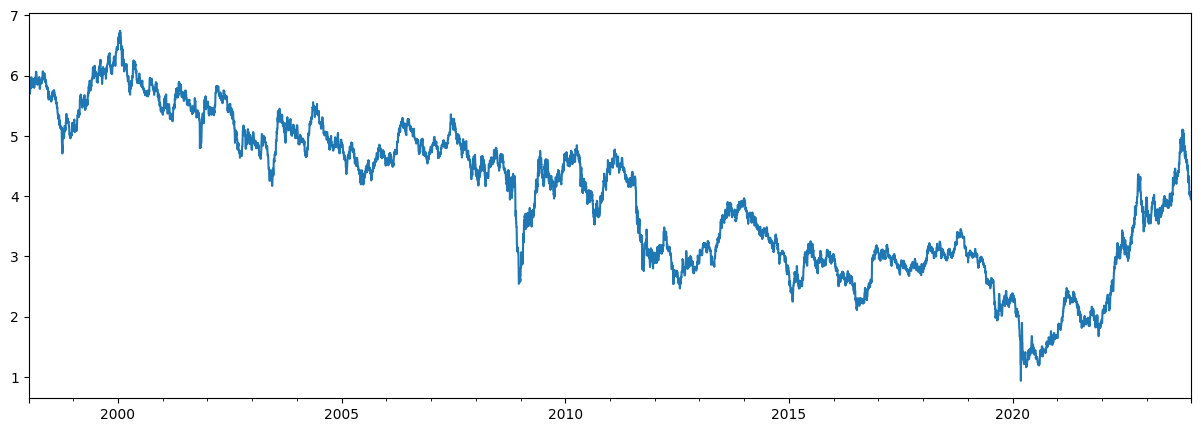

In [ ]:
yield_day_new = yield_day.reindex(new_index).ffill()
plt.figure(figsize=(15,5))
yield_day_new['Close'].plot()

In [ ]:
print('\nUnique dates in our data: ', len(yield_day_new.index.unique()), 'Days')
our_date_range = yield_day_new.index.max() - yield_day_new.index.min()
print('Total days in our date range:', our_date_range.days, 'Days')
yield_day_new.shape
yield_day_new.head()


Unique dates in our data:  9493 Days
Total days in our date range: 9492 Days


,Adj Close,Close,High,Low,Open,Volume
1998-01-02,5.8480000495910645,5.848,5.921999931335449,5.8379998207092285,5.920000076293945,0
1998-01-03,5.8480000495910645,5.848,5.921999931335449,5.8379998207092285,5.920000076293945,0
1998-01-04,5.8480000495910645,5.848,5.921999931335449,5.8379998207092285,5.920000076293945,0
1998-01-05,5.729000091552734,5.729,5.789999961853027,5.724999904632568,5.788000106811523,0
1998-01-06,5.7179999351501465,5.718,5.770999908447266,5.714000225067139,5.7230000495910645,0


In [ ]:
def get_n_last_days(df, series_name, n_days):
    """
    Extract last n_days of an hourly time series
    """

    return df[series_name][-n_days:]

def plot_n_last_days(df, series_name, n_days):
    """
    Plot last n_days of an hourly time series
    """
    plt.figure(figsize = (10,5))
    plt.plot(get_n_last_days(df, series_name, n_days), 'k-')
    plt.title('{0} American Treasury Yield - {1} days'
              .format(series_name, n_days))
    plt.xlabel('Recorded Day')
    plt.ylabel('Reading')
    plt.grid(alpha=0.3)

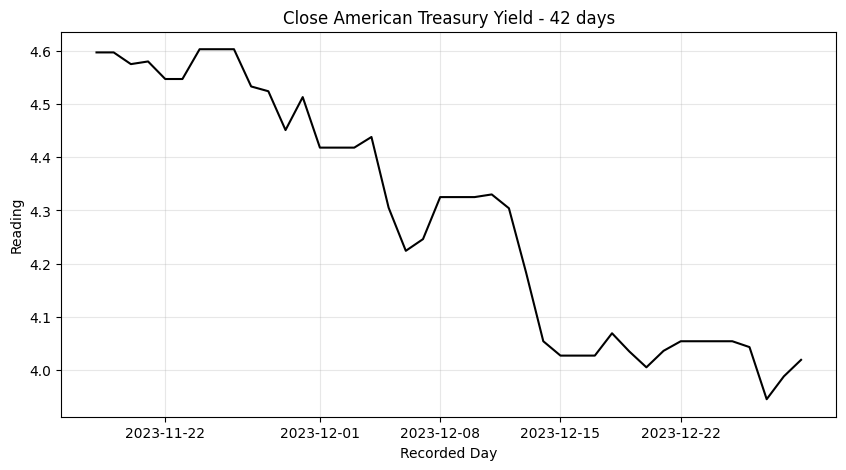

In [ ]:
plot_n_last_days (yield_day_new, 'Close', 42)

In [ ]:
yield_day_new['Close'].head()

,Close
1998-01-02,5.848
1998-01-03,5.848
1998-01-04,5.848
1998-01-05,5.729
1998-01-06,5.718


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError

In [ ]:
def get_keras_format_series(series):
    """
    Convert a series to numpy array of shape
    [n_samples, time_steps, features]
    """
    series = np.array(series)
    return series.reshape(series.shape[0], series.shape[1], 1)

In [ ]:
"""
length_yield_day_new = 9493
we will use 9490
"""
forecast_series = get_n_last_days(yield_day_new, 'Close', 9490).values
train = forecast_series[:-1898]
test = forecast_series[-1898:]
print(train)
print(len(train))
print(test)
print(len(test))
print(forecast_series[0])

[5.72900009 5.71799994 5.79300022 ... 3.32999992 3.34599996 3.35899997]
7592
[3.38400006 3.38400006 3.38400006 ... 3.94499993 3.98799992 4.01900005]
1898
5.729000091552734


In [ ]:
def get_train_test_data(df, series_name, series_days, input_hours,
                        test_hours, sample_gap=3):
    """
    Utility processing function that splits an hourly time series into
    train and test with keras-friendly format, according to user-specified
    choice of shape.

    arguments
    ---------
    df (dataframe): dataframe with time series columns
    series_name (string): column name in df
    series_days (int): total days to extract
    input_hours (int): length of sequence input to network
    test_hours (int): length of held-out terminal sequence
    sample_gap (int): step size between start of train sequences; default 5

    returns
    ---------
    tuple: train_X, test_X_init, train_y, test_y
    """

    forecast_series = get_n_last_days(df, series_name, series_days).values # reducing our forecast series to last n days

    train = forecast_series[:-test_hours] # training data is remaining days until amount of test_hours
    test = forecast_series[-test_hours:] # test data is the remaining test_hours

    train_X, train_y = [], []

    # range 0 through # of train samples - input_hours by sample_gap.
    # This is to create many samples with corresponding
    for i in range(0, train.shape[0]-input_hours, sample_gap):
        train_X.append(train[i:i+input_hours]) # each training sample is of length input hours
        train_y.append(train[i+input_hours]) # each y is just the next step after training sample

    train_X = get_keras_format_series(train_X) # format our new training set to keras format
    train_y = np.array(train_y) # make sure y is an array to work properly with keras

    # The set that we had held out for testing (must be same length as original train input)
    test_X_init = test[:input_hours]
    test_y = test[input_hours:] # test_y is remaining values from test set

    return train_X, test_X_init, train_y, test_y

In [ ]:
def predict(X_init, n_steps, model):
    """
    Given an input series matching the model's expected format,
    generates model's predictions for next n_steps in the series
    """

    X_init = X_init.copy().reshape(1,-1,1)
    preds = []

    # iteratively take current input sequence, generate next step pred,
    # and shift input sequence forward by a step (to end with latest pred).
    # collect preds as we go.
    for _ in range(n_steps):
        pred = model.predict(X_init)
        preds.append(pred)
        X_init[:,:-1,:] = X_init[:,1:,:] # replace first 11 values with 2nd through 12th
        X_init[:,-1,:] = pred # replace 12th value with prediction

    preds = np.array(preds).reshape(-1,1)

    return preds

def predict_and_plot(X_init, y, model, title):
    """
    Given an input series matching the model's expected format,
    generates model's predictions for next n_steps in the series,
    and plots these predictions against the ground truth for those steps

    arguments
    ---------
    X_init (array): initial sequence, must match model's input shape
    y (array): true sequence values to predict, follow X_init
    model (keras.models.Sequential): trained neural network
    title (string): plot title
    """

    y_preds = predict(test_X_init, n_steps=len(y), model=model) # predict through length of y
    # Below ranges are to set x-axes
    start_range = range(1, test_X_init.shape[0]+1) #starting at one through to length of test_X_init to plot X_init
    predict_range = range(test_X_init.shape[0], test_hours)  #predict range is going to be from end of X_init to length of test_hours

    #using our ranges we plot X_init
    plt.plot(start_range, test_X_init)
    #and test and actual preds
    plt.plot(predict_range, test_y, color='orange')
    plt.plot(predict_range, y_preds, color='teal', linestyle='--')

    plt.title(title)
    plt.legend(['Initial Series','Target Series','Predictions'])

In [ ]:
series_days = 7300
input_days = 60
test_hours = 120

# Load data and split into training and testing
train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(yield_day_new, 'Close', series_days,
                         input_days, test_hours, sample_gap=5))
print('Training input shape: {}'.format(train_X.shape))
print('Training output shape: {}'.format(train_y.shape))
print('Test input shape: {}'.format(test_X_init.shape))
print('Test output shape: {}'.format(test_y.shape))

Training input shape: (1424, 60, 1)
Training output shape: (1424,)
Test input shape: (60,)
Test output shape: (60,)


In [ ]:
model = Sequential([
    LSTM(100, activation='relu', return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])),
    LSTM(50, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanAbsoluteError(), MeanSquaredError()])
model.summary()

# Train model
history = model.fit(train_X, train_y, epochs=200, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate model on test data
evaluation = model.evaluate(test_X_init, test_y, verbose=1)
print(f"Test MAE: {evaluation[1]}, Test MSE: {evaluation[2]}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - loss: 8.4307 - mean_absolute_error: 2.6650 - mean_squared_error: 8.4307 - val_loss: 0.9922 - val_mean_absolute_error: 0.9666 - val_mean_squared_error: 0.9922
Epoch 2/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.4232 - mean_absolute_error: 0.5106 - mean_squared_error: 0.4232 - val_loss: 0.0205 - val_mean_absolute_error: 0.1195 - val_mean_squared_error: 0.0205
Epoch 3/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0120 - mean_absolute_error: 0.0837 - mean_squared_error: 0.0120 - val_loss: 0.0160 - val_mean_absolute_error: 0.1036 - val_mean_squared_error: 0.0160
Epoch 4/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0097 - mean_absolute_error: 0.0761 - mean_squared_error: 0.0097 - val_loss: 0.0135 - val_mean_absolute_error: 0.0934 - val_mean_squared_error: 0.0135
Epoch 5/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0099 - mean_absolute_error: 0.0781 - mean_squared_error: 0.0099 - val_loss: 0.0135 - val_m

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━

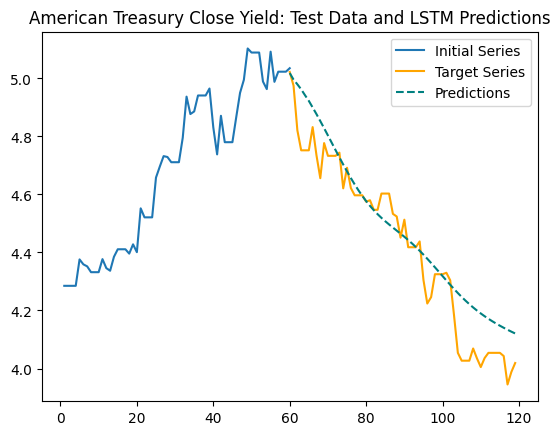

In [ ]:
predict_and_plot(test_X_init, test_y, model,
                 'American Treasury Close Yield: Test Data and LSTM Predictions')